In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd "/content/drive/MyDrive"
!ls

28NOV23_porsche_911_data_cleaned.csv  Porschesales.csv	vehicles.csv
__MACOSX			      Porschesales.zip	vehicles.csv.zip


In [ ]:
%cd "/content/drive/My Drive/Vehicles project"
!ls


/content/drive/My Drive/Vehicles project
28NOV23_porsche_911_data_cleaned.csv  Porschesales.csv	vehicles.csv
__MACOSX			      Porschesales.zip	vehicles.csv.zip


In [ ]:
import zipfile
zip_path = 'vehicles.csv.zip'
extract_to = '/content/drive/My Drive/Vehicles project'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Vehicles project/vehicles.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


Importing matlab to plot different graphs to represent the data
Here you can see that the data is not correct, as there are way too many points that are at 0

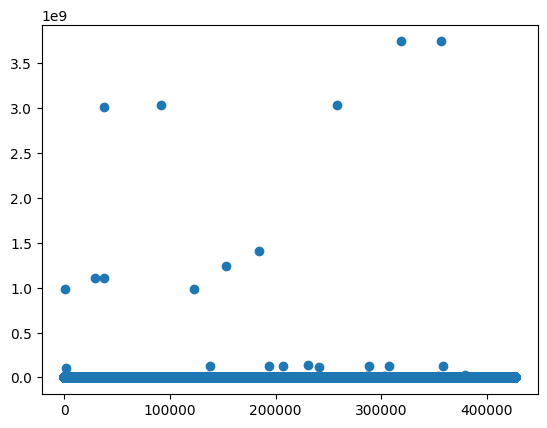

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.index,df['price'])

Attempting to use different graph types to see if result is different


{'whiskers': [<matplotlib.lines.Line2D at 0x7f69bac26200>,
 'caps': [<matplotlib.lines.Line2D at 0x7f69bac26740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f69bac26080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f69bac26c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f69bac26f20>],
 'means': []}

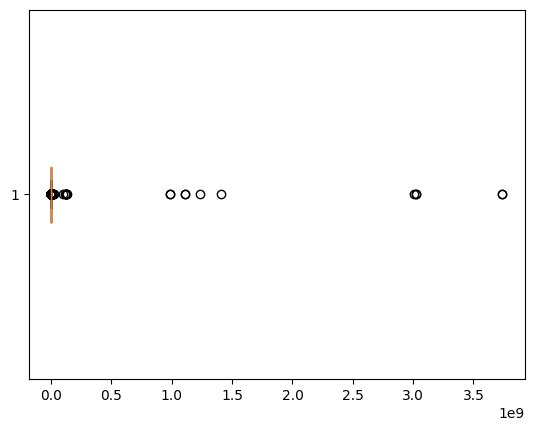

In [ ]:
plt.boxplot(df['price'], vert=False)

<Axes: xlabel='price', ylabel='Density'>

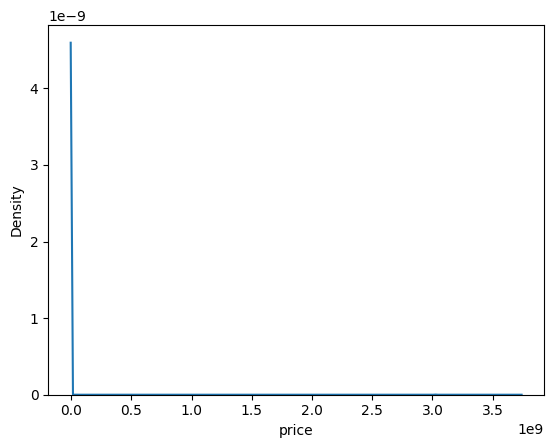

In [ ]:
import seaborn as sns

sns.kdeplot(df['price'])

The type of graph is not the issue, it is that the data needs to be cleaned as the outliers are messing up the points. The data is filtered to exclude any vehicles above $100,000

In [ ]:
(df['price']>100000).sum()
filter_df = df[df['price']<100000]

<Axes: xlabel='price', ylabel='Density'>

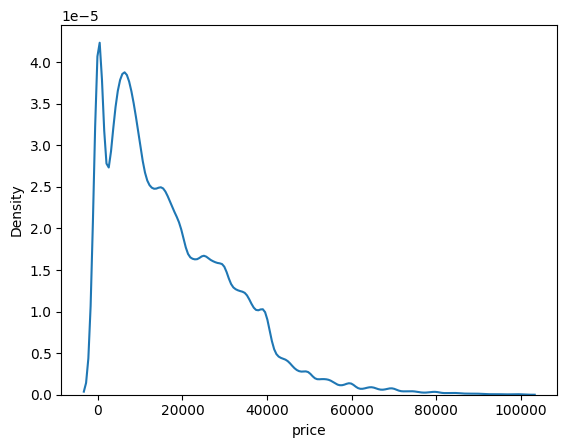

In [ ]:
sns.kdeplot(filter_df['price'])

Scatter plot is not useful as there are too many points for proper visual representation. One thing you can take from this is that there are many vehicles for sale at almost every price point.

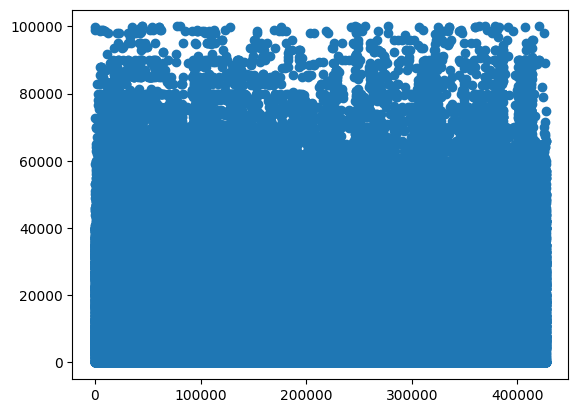

In [ ]:
plt.scatter(filter_df.index,filter_df['price'])

(array([95312., 79652., 53811., 49107., 34812., 34946., 26552., 23510.,
         9494.,  6643.,  3773.,  2948.,  1535.,  1617.,   821.,   702.,
          391.,   304.,   114.,   139.]),
 array([    0.  ,  4999.95,  9999.9 , 14999.85, 19999.8 , 24999.75,
        29999.7 , 34999.65, 39999.6 , 44999.55, 49999.5 , 54999.45,
        59999.4 , 64999.35, 69999.3 , 74999.25, 79999.2 , 84999.15,
        89999.1 , 94999.05, 99999.  ]),
 <BarContainer object of 20 artists>)

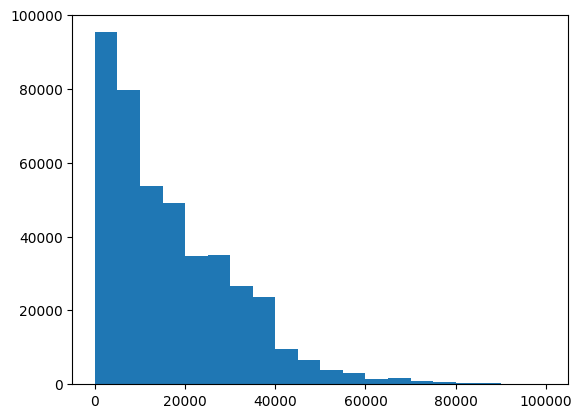

In [ ]:
plt.hist(filter_df['price'], bins = 20)

Here you can see there is a spike at the beginning of the graph. This is caused by people who enter the price of their vehicle as $0,$99,etc. The range is also lowered to 20,000 temporarily to get a better overview of the vehicle distribution in the lower price range.

In [ ]:
filter_df = df[df['price']<20000]

(array([46315.,  6662., 10839., 14952., 16544., 17358., 17423., 16324.,
        15069., 13478., 11439., 10152., 11238.,  9988., 10994., 10784.,
        10348.,  9284.,  9121.,  9570.]),
 array([    0.  ,   999.95,  1999.9 ,  2999.85,  3999.8 ,  4999.75,
         5999.7 ,  6999.65,  7999.6 ,  8999.55,  9999.5 , 10999.45,
        11999.4 , 12999.35, 13999.3 , 14999.25, 15999.2 , 16999.15,
        17999.1 , 18999.05, 19999.  ]),
 <BarContainer object of 20 artists>)

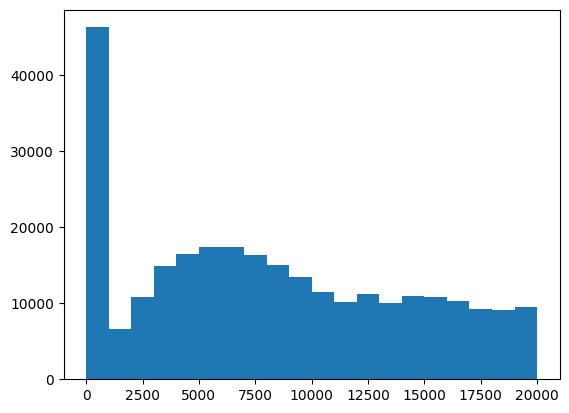

In [ ]:
plt.hist(filter_df['price'], bins = 20)

Here any vehicles priced below $100 are filtred out.

In [ ]:
filter_df = df[df['price']<80000]
filter_df = filter_df[filter_df['price']>100]

(array([14557., 15993., 22608., 26939., 31155., 18935., 20960., 14246.,
        17502., 20866., 13016., 15638., 11871., 11294., 13165.,  9694.,
        11901.,  9177., 12291., 10094.,  7261.,  9145.,  6272.,  6755.,
        10152.,  2345.,  3412.,  2124.,  3040.,  2344.,  1295.,  1959.,
          984.,  1399.,  1427.,   564.,   834.,  1028.,   393.,   655.,
          583.,   408.,   311.,   774.,   237.,   217.,   376.,    92.,
          183.,   375.]),
 array([  101.  ,  1698.96,  3296.92,  4894.88,  6492.84,  8090.8 ,
         9688.76, 11286.72, 12884.68, 14482.64, 16080.6 , 17678.56,
        19276.52, 20874.48, 22472.44, 24070.4 , 25668.36, 27266.32,
        28864.28, 30462.24, 32060.2 , 33658.16, 35256.12, 36854.08,
        38452.04, 40050.  , 41647.96, 43245.92, 44843.88, 46441.84,
        48039.8 , 49637.76, 51235.72, 52833.68, 54431.64, 56029.6 ,
        57627.56, 59225.52, 60823.48, 62421.44, 64019.4 , 65617.36,
        67215.32, 68813.28, 70411.24, 72009.2 , 73607.16, 75205.12

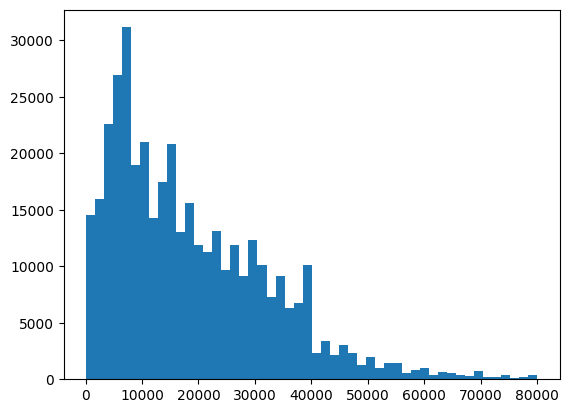

In [ ]:
plt.hist(filter_df['price'], bins =50)

Now the same process is done to the odometer data. Any entries below 1000 miles are filtered out, due to the fact that many people ignore that entry and have it set to 0.

In [ ]:
filter_df = df[df['odometer']<200000]
filter_df = filter_df[filter_df['odometer']>1000]

(array([ 7612.,  8487.,  9636., 10812., 10912., 11517., 10853., 12095.,
        10688.,  9995.,  9939.,  8734.,  8317.,  7755.,  8102.,  8169.,
         8280.,  9300.,  8710.,  9502.,  8718.,  8464.,  9288.,  9390.,
        11977.,  8796.,  8654.,  8566.,  7972.,  8632.,  8089.,  7895.,
         8113.,  6964.,  7559.,  6281.,  6508.,  7054.,  5706.,  5933.,
         4798.,  4744.,  4705.,  3937.,  4494.,  3208.,  3196.,  3129.,
         2344.,  2125.]),
 array([  1001.  ,   4980.96,   8960.92,  12940.88,  16920.84,  20900.8 ,
         24880.76,  28860.72,  32840.68,  36820.64,  40800.6 ,  44780.56,
         48760.52,  52740.48,  56720.44,  60700.4 ,  64680.36,  68660.32,
         72640.28,  76620.24,  80600.2 ,  84580.16,  88560.12,  92540.08,
         96520.04, 100500.  , 104479.96, 108459.92, 112439.88, 116419.84,
        120399.8 , 124379.76, 128359.72, 132339.68, 136319.64, 140299.6 ,
        144279.56, 148259.52, 152239.48, 156219.44, 160199.4 , 164179.36,
        168159.32, 17213

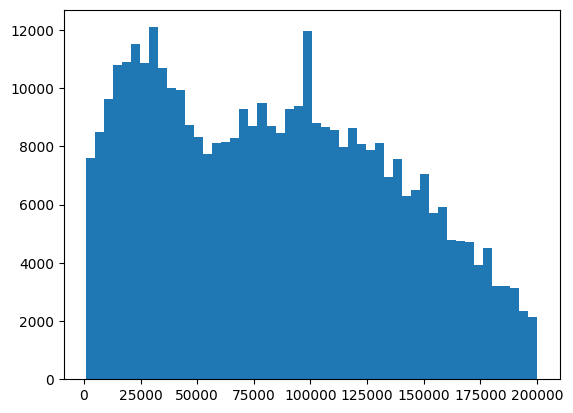

In [ ]:
plt.hist(filter_df['odometer'], bins =50)

Here a line graph is used instead as another way to properly see the data.

<Axes: xlabel='odometer', ylabel='Density'>

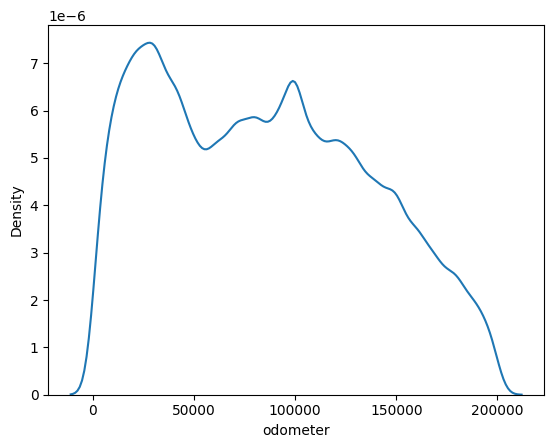

In [ ]:
sns.kdeplot(filter_df['odometer'])

In [ ]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
filter_df = df[df['price']<150000]
filter_df = filter_df[filter_df['price']>1000]
filter_df = filter_df[filter_df['odometer']<200000]
filter_df = filter_df[filter_df['odometer']>1000]

<Axes: xlabel='odometer', ylabel='Density'>

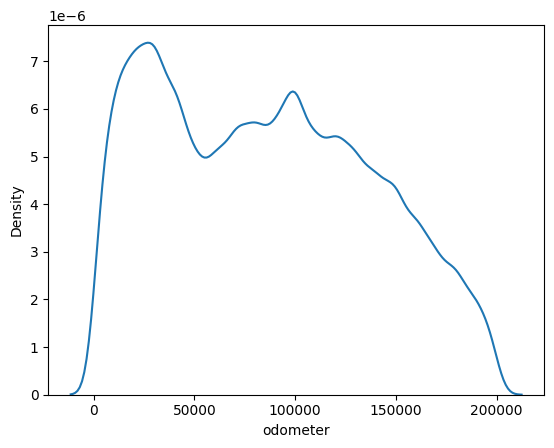

In [ ]:
sns.kdeplot(filter_df['odometer'])

In [ ]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


Here a new column in the data frame is made that shows the price per odometer. This helps show the ratio of the price to the vehicles mileage. For example a ratio of 0.25 means the cars price is a quarter of what the mileage is. A vehicle with 100,000 miles would be listed for $25,000

In [ ]:
import pandas as pd

filter_df = df[df['price']<80000]
filter_df = filter_df[filter_df['price']>100]

filter_df = filter_df[filter_df['odometer']<200000]
filter_df = filter_df[filter_df['odometer']>1000]

filter_df['price_per_odometer'] = filter_df['price'] / filter_df['odometer']



Here is a table representing the ratio. It can be seen the majority of cars have a ratio around 0.25, meaning the price is a quarter of the mileage.

<Axes: xlabel='price_per_odometer', ylabel='Density'>

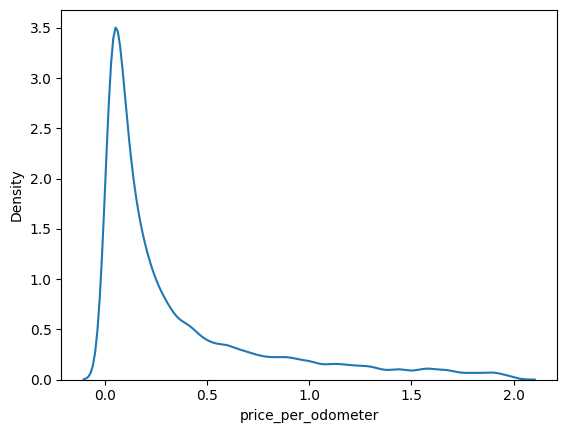

In [ ]:
filter_df=filter_df[filter_df['price_per_odometer'] < 2]
sns.kdeplot(filter_df['price_per_odometer'])

Here is a zoomed in version of the above graph.

<Axes: xlabel='price_per_odometer', ylabel='Density'>

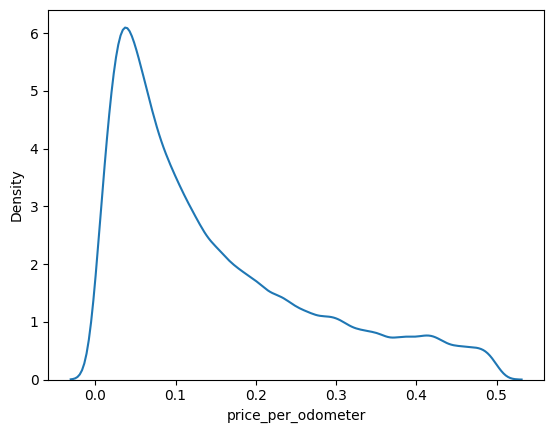

In [ ]:
filter_df=filter_df[filter_df['price_per_odometer'] < 0.5]
sns.kdeplot(filter_df['price_per_odometer'])

In [ ]:
unique_region = filter_df['region'].nunique()
print("Number of unique region:", unique_region)

Number of unique region: 404


### **Number of unique region: 404**



In [ ]:
average_prices = filter_df.groupby('region')['price'].agg(['mean', 'count'])
sorted_average_prices = average_prices.sort_values(by='mean', ascending=False)
print(sorted_average_prices)


                           mean  count
region                                
southwest TX       29060.000000     21
san angelo         28288.857143    105
southwest VA       26328.100719    139
northwest KS       25652.222222     36
galveston          24850.080808     99
...                         ...    ...
southern illinois   8862.893293    328
detroit metro       8791.585112   2015
siskiyou county     8776.591837     49
north central FL    7771.287356     87
kenosha-racine      6022.305172    580

[404 rows x 2 columns]


This shows the regions that have the highest average car prices. Any regions with under 500 listings are disregarded.

In [ ]:
average_prices = filter_df.groupby('region')['price'].agg(['mean', 'count'])
sorted_average_prices = average_prices.sort_values(by='mean', ascending=False)
filtered_average_prices = sorted_average_prices[sorted_average_prices['count']>500]
print(filtered_average_prices)

                        mean  count
region                             
lakeland        19479.235644    505
tri-cities      19329.346875    640
greensboro      18885.510661    938
billings        18605.609921    887
bakersfield     18459.085506    959
...                      ...    ...
philadelphia     9740.619001   2042
new haven        9593.681550   1187
salem            9492.838182   1650
detroit metro    8791.585112   2015
kenosha-racine   6022.305172    580

[158 rows x 2 columns]


In [ ]:
len(filter_df['price'])

247062

This is taking the sale price column and dividing it into the specified bins. Then the average odometer reading per bin is calculated and plotted against the sold price.

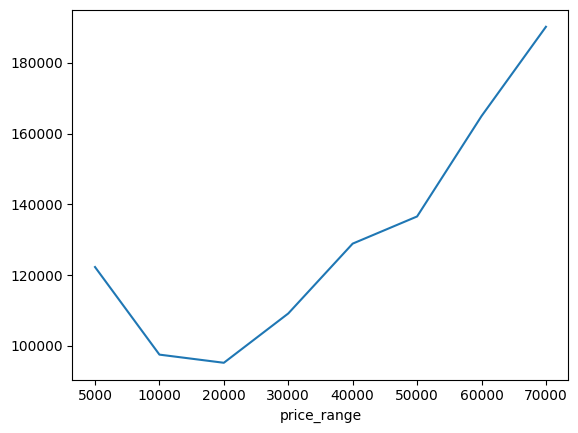

In [ ]:
bins = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
filter_df['price_range'] = pd.cut(filter_df['price'], bins=bins, labels=['5000', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000'])
grouped = filter_df.groupby('price_range')
avg_odo_per_price_range = grouped['odometer'].mean()
avg_odo_per_price_range.plot(kind='line')
plt.show()

This is the filtered/ correct version of the plot, after removing outliers.

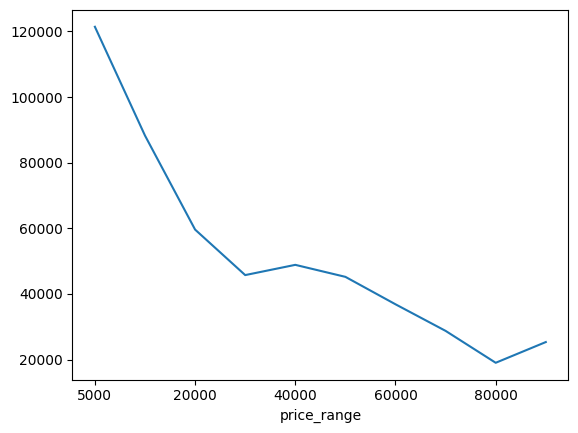

In [ ]:
filter_df = df[df['price']<150000]
filter_df = filter_df[filter_df['price']>1000]
filter_df = filter_df[filter_df['odometer']<200000]
filter_df = filter_df[filter_df['odometer']>1000]

bins = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
filter_df['price_range'] = pd.cut(filter_df['price'], bins=bins, labels=['5000', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000'])
grouped = filter_df.groupby('price_range')
avg_odo_per_price_range = grouped['odometer'].mean()
avg_odo_per_price_range.plot(kind='line')
plt.show()

In [ ]:
filter_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_range
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:18-0500,30000
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:08-0500,20000
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:25-0500,30000
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,30000
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,20000
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,30000
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,30000
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,20000


Importing another data set that only includes used car information for Porsche.

In [ ]:
%cd "/content/drive/My Drive/Vehicles project"
!ls

/content/drive/My Drive/Vehicles project
28NOV23_porsche_911_data_cleaned.csv  Porschesales.csv	vehicles.csv
__MACOSX			      Porschesales.zip	vehicles.csv.zip


In [ ]:
import zipfile
zip_path = 'Porschesales.zip'
extract_to = '/content/drive/My Drive/Vehicles project'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
file_path = '/content/drive/My Drive/Vehicles project/28NOV23_porsche_911_data_cleaned.csv'
df = pd.read_csv(file_path)

This is plotting the density of the price of sold cars and sold Porsches.

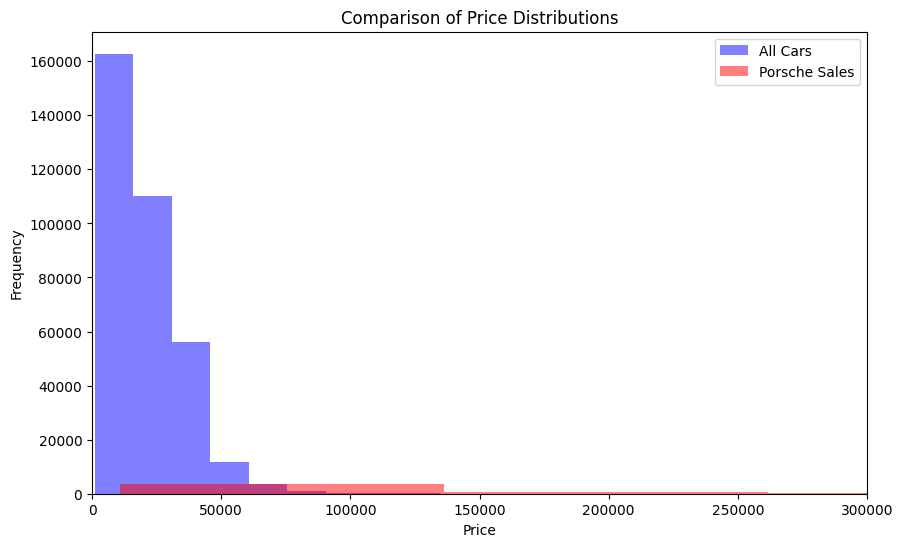

In [ ]:
bins = 10
alpha = 0.5
plt.figure(figsize=(10, 6))

plt.hist(filter_df['price'], bins=bins, alpha=alpha, label='All Cars', color='blue')

plt.hist(df['sold_price'], bins=bins, alpha=alpha, label='Porsche Sales', color='red')


plt.xlim(0,300000)


plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Comparison of Price Distributions')

plt.legend()
plt.show()




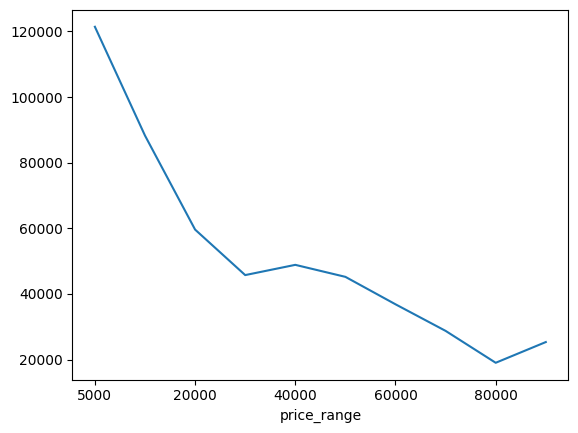

In [ ]:
bins = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
filter_df['price_range'] = pd.cut(filter_df['price'], bins=bins, labels=['5000', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000'])
grouped = filter_df.groupby('price_range')
avg_odo_per_price_range = grouped['odometer'].mean()
avg_odo_per_price_range.plot(kind='line')
plt.show()

Now the Porsche data set is plotted using the same method as a few steps up, taking the average sale price among each specified bin, then taking the average odoemeter reading for each bin and plotting it against the same plot for all used cars.

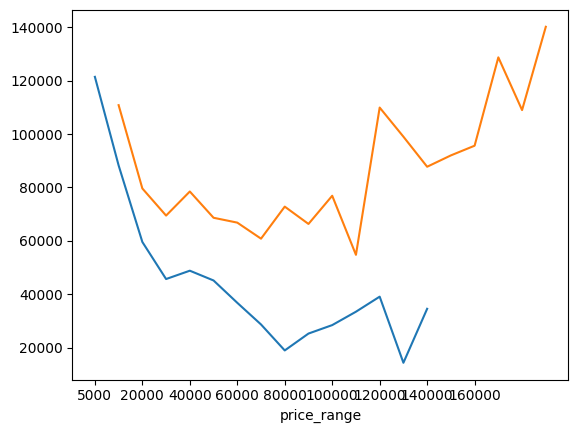

In [ ]:
bins = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]
filter_df['price_range'] = pd.cut(filter_df['price'], bins=bins, labels=['5000', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000', '100000', '110000', '120000', '130000', '140000', '150000', '160000', '170000', '180000', '190000'])
grouped = filter_df.groupby('price_range')
avg_odo_per_price_range = grouped['odometer'].mean()
avg_odo_per_price_range.plot(kind='line')

bins = [5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]
df['price_range'] = pd.cut(df['sold_price'], bins=bins, labels=['5000', '10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000', '90000', '100000', '110000', '120000', '130000', '140000', '150000', '160000', '170000', '180000', '190000'])
grouped = df.groupby('price_range')
avg_odo_per_price_range = grouped['mileage'].mean()
avg_odo_per_price_range.plot(kind='line')


plt.show()